# Unet
##   3-Channel version: DWI, ADC and b0
##   Trained on JAS

In [6]:
import sys
sys.path.append('../../')

# Loads all methods and data for testing
from Performance.methods_for_testing_Unet import *

In [7]:
channels = 3
model_path = '/home/rosengaard/mri-infarct-segmentation/Anders/V3/Unet_C3/JAS/weights/Unet_C3_model.pt'
trained_on_dataset = "JAS"
type = "test"

In [8]:
# Load model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
m_state_dict = torch.load(model_path, map_location=torch.device(device))
model = UNet(n_class=1, n_channels=channels).to(device)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
model.load_state_dict(m_state_dict)

# Load data
test_data_path = os.path.join(current_directory, 'mri-infarct-segmentation/data/DUPONT/datasplit/FixedPath/test_data.csv')
testDataset = CustomDataset(test_data_path, channels, trained_on_dataset, type)
testDataLoader = torch.utils.data.DataLoader(testDataset,
                                            batch_size=1,
                                            shuffle=False,
                                            num_workers = 0
                                            )

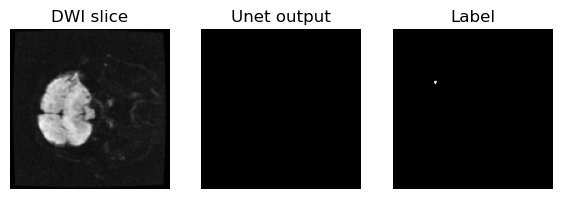

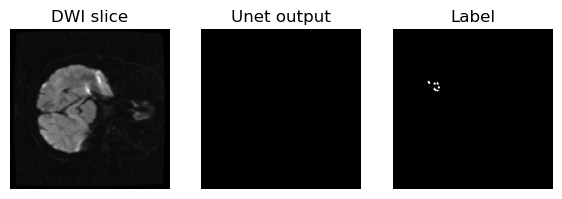

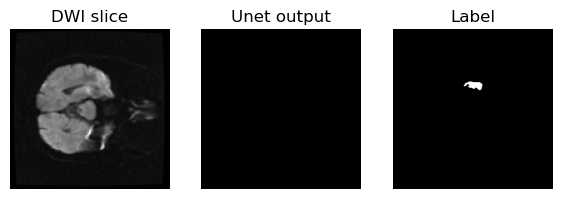

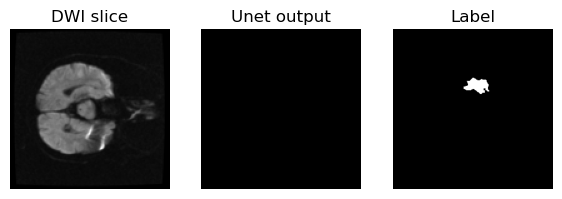

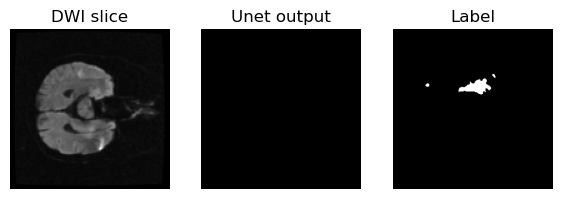

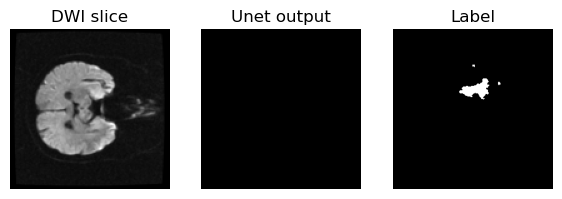

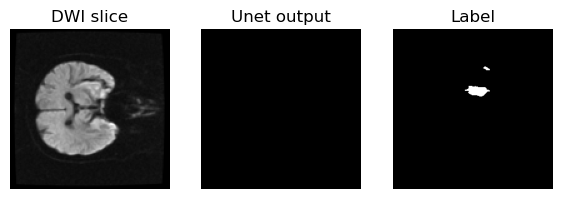

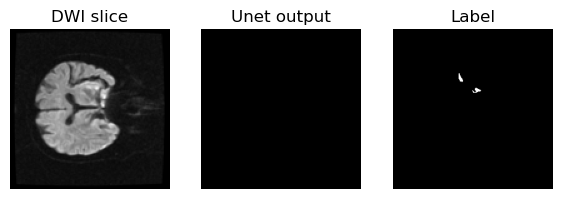

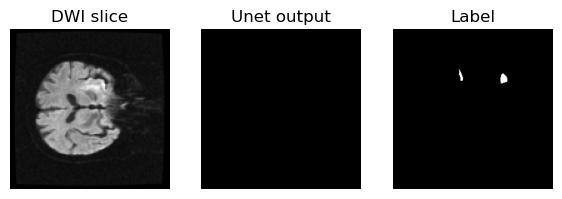

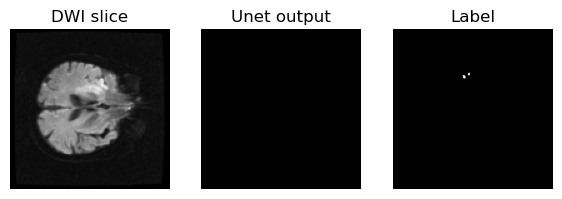

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


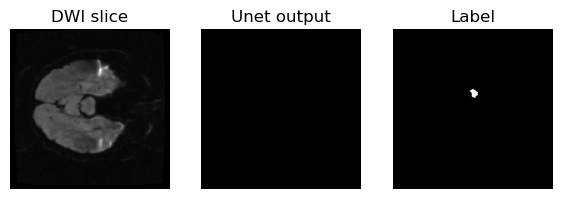

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


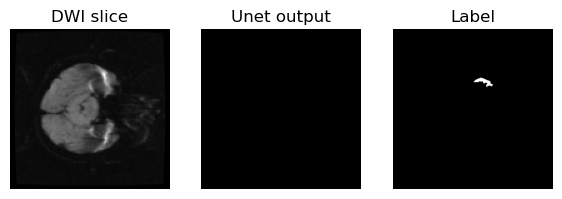

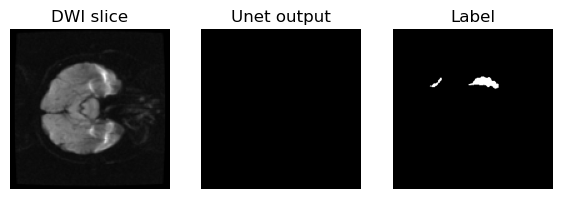

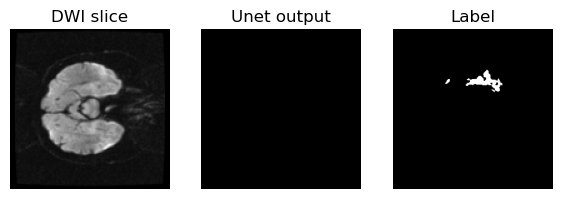

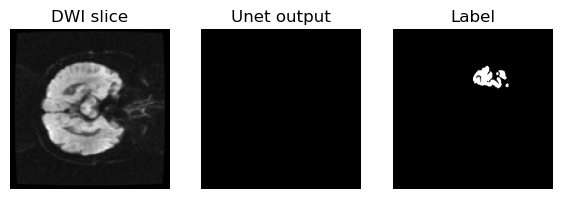

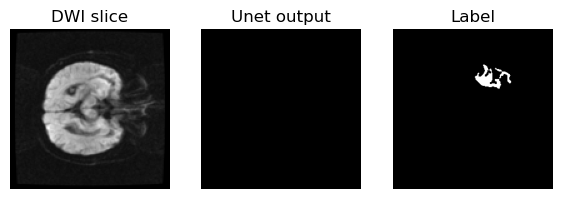

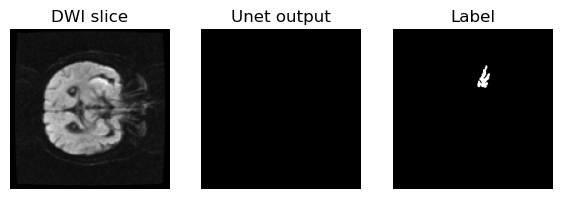

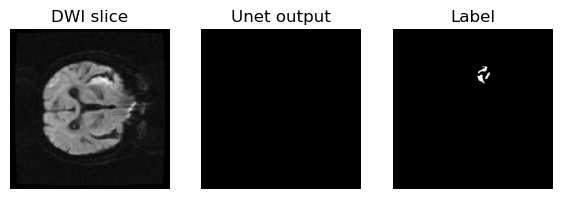

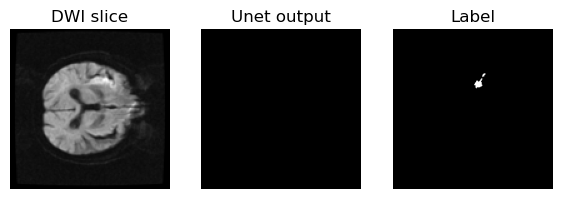

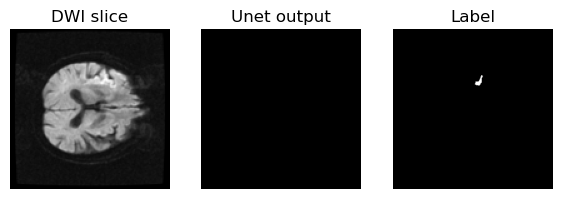

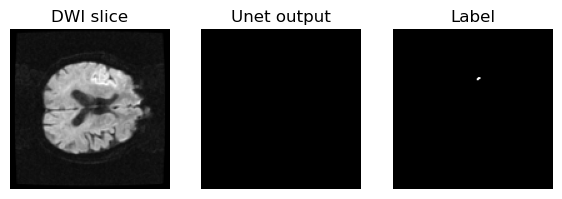

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


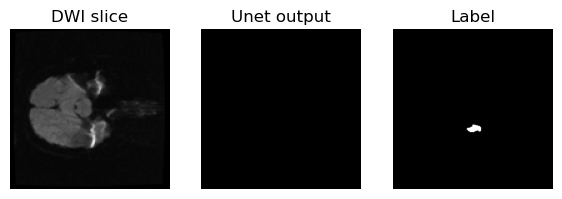

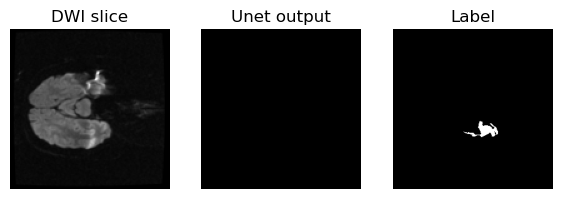

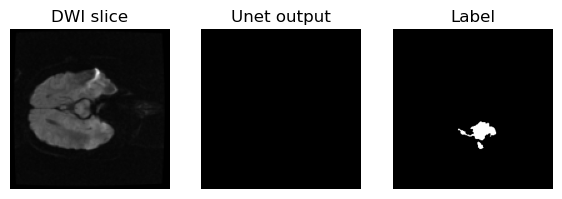

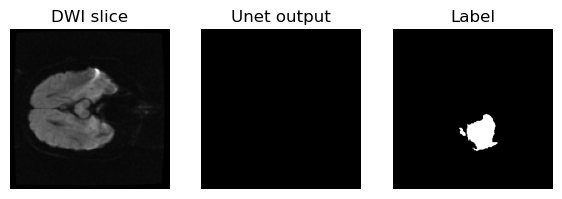

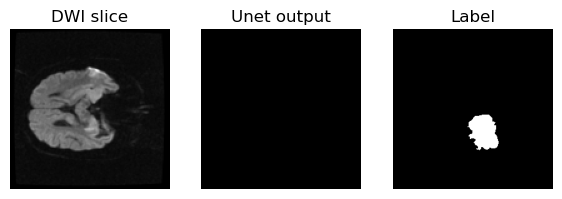

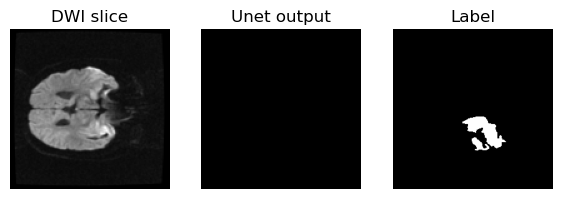

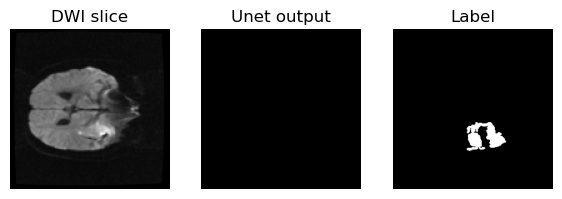

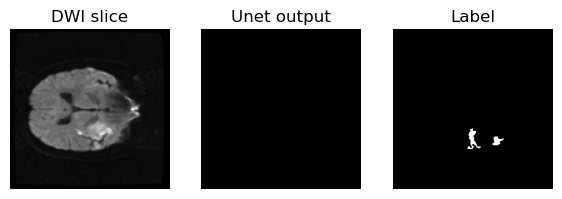

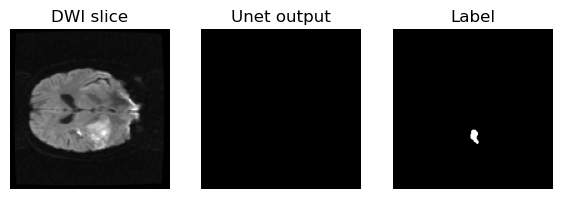

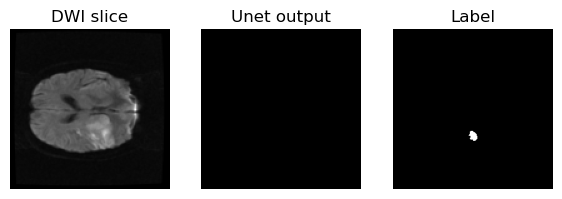

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


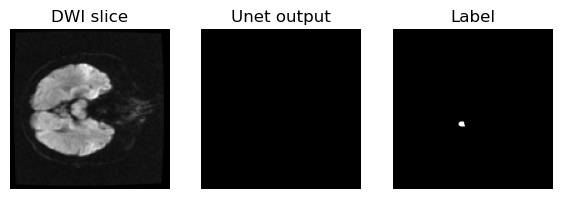

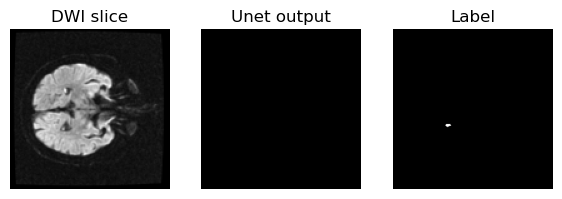

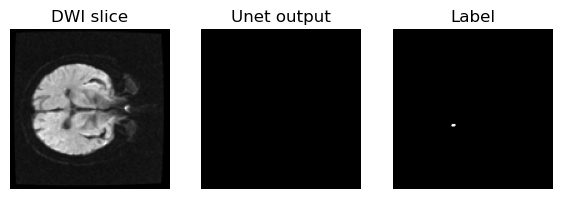

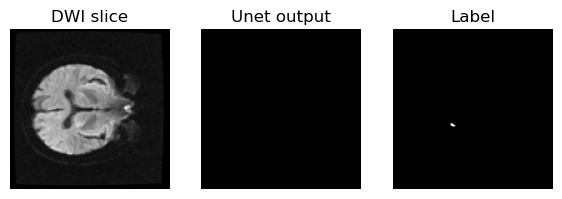

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


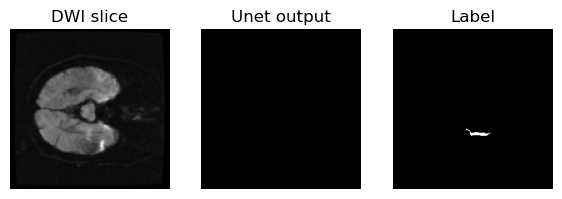

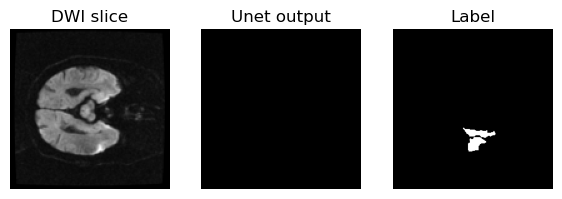

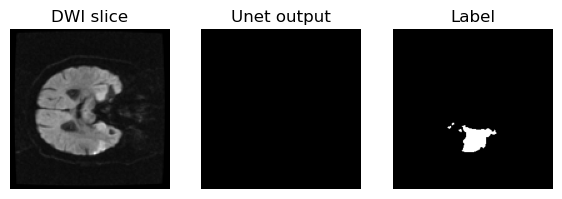

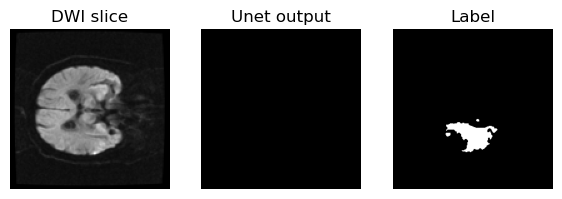

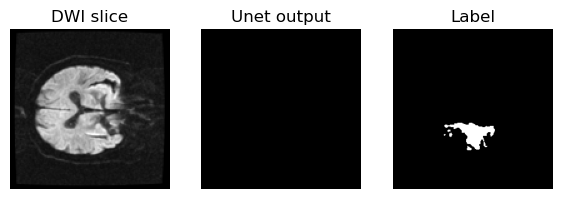

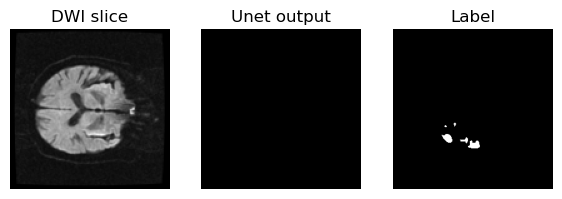

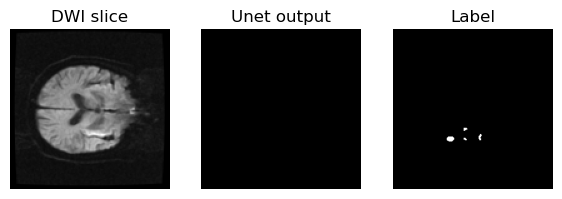

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


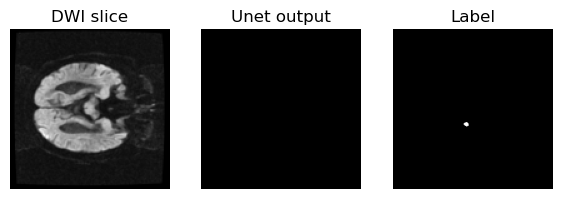

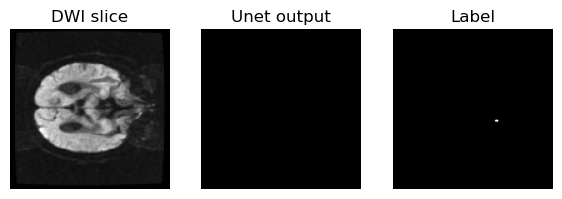

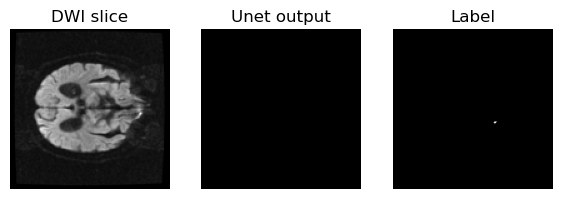

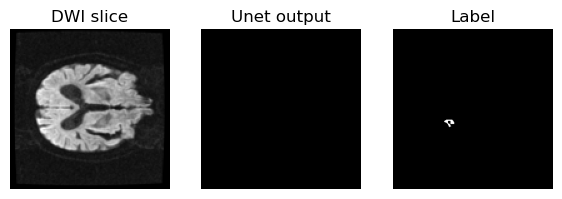

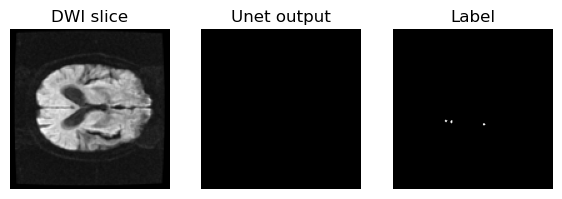

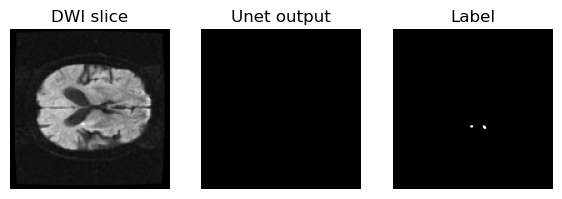

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________


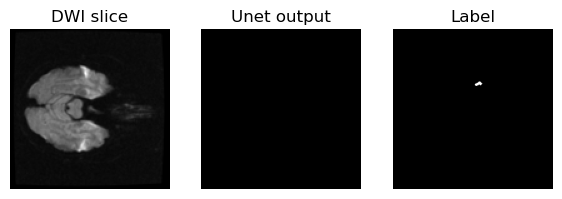

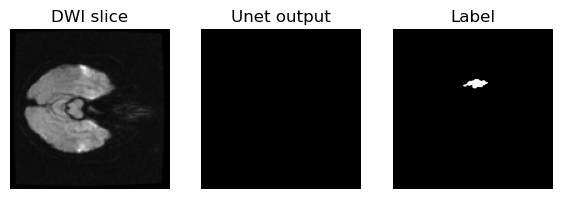

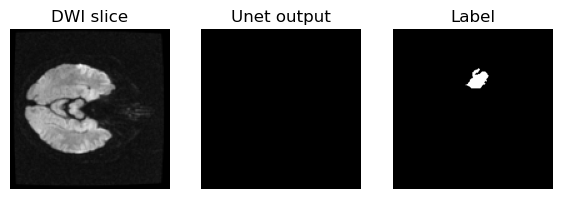

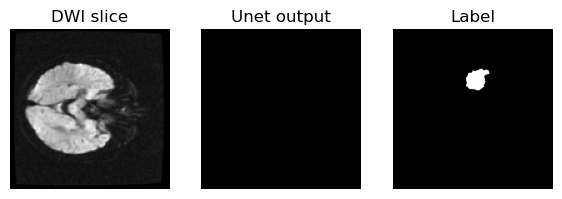

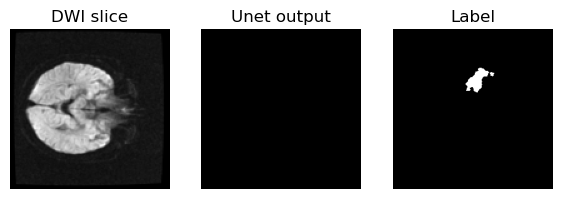

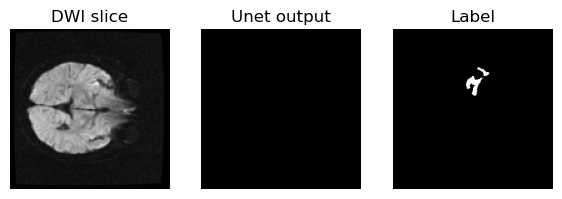

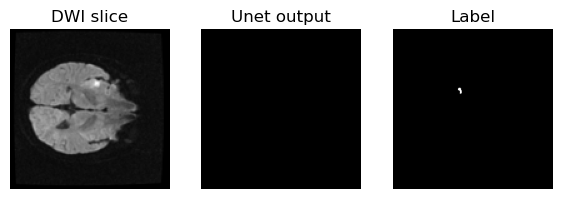

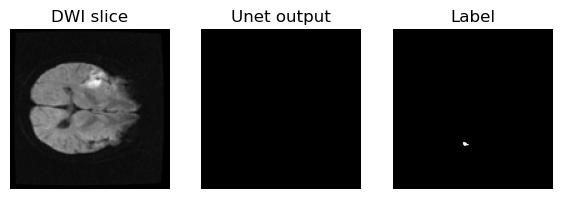

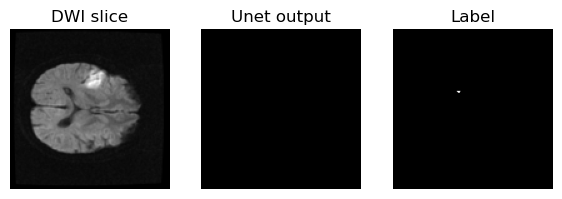

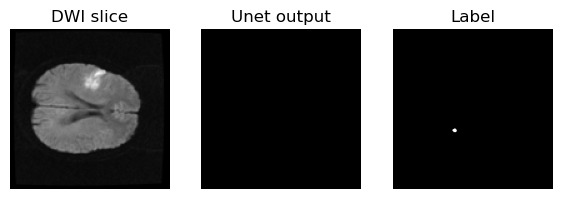

Mean slice dice for subject: 0
Volume dice for subject: 0.0
__________________________________
_____________________________________________________
Mean slice dice for each subject: [0, 0, 0, 0, 0, 0, 0, 0]
Volume dice for each subject: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Mean slice dice for all subjects: 0
Mean volume dice for all subjects: 0.0


In [11]:
#Test loop:
Dice_slices_subjects = [] #Slice based
Dice_slice_avg_subjects = [] #Slice based
Dice_vol_subjects = [] #Volume based
for x_val, yval in testDataLoader:
    with torch.cuda.amp.autocast():
        output = model(x_val.to(device))
    torch.cuda.empty_cache()
    
    # Dice and Plot
    dice_slices, dice_vol = plotAndDice(yval[0,0,:,:,:], x_val[0,0,:,:,:], output[0,0,:,:,:], trained_on_dataset)
    Dice_vol_subjects.append(dice_vol)
    Dice_slices_subjects.append(dice_slices)
    if np.sum(dice_slices) == 0:
        Dice_slice_avg = 0
    else:
        Dice_slice_avg = mean(dice_slices)
    Dice_slice_avg_subjects.append(Dice_slice_avg)
    #Dice_slice_avg_subjects.append(mean(dice_slices))
    
    print('Mean slice dice for subject:', round(Dice_slice_avg,3))
    print('Volume dice for subject:', round(dice_vol,3))
    print('__________________________________')
print('_____________________________________________________')
print('Mean slice dice for each subject:', Dice_slice_avg_subjects)
print('Volume dice for each subject:', Dice_vol_subjects)
print('')
print('Mean slice dice for all subjects:', mean(Dice_slice_avg_subjects))
print('Mean volume dice for all subjects:', mean(Dice_vol_subjects))

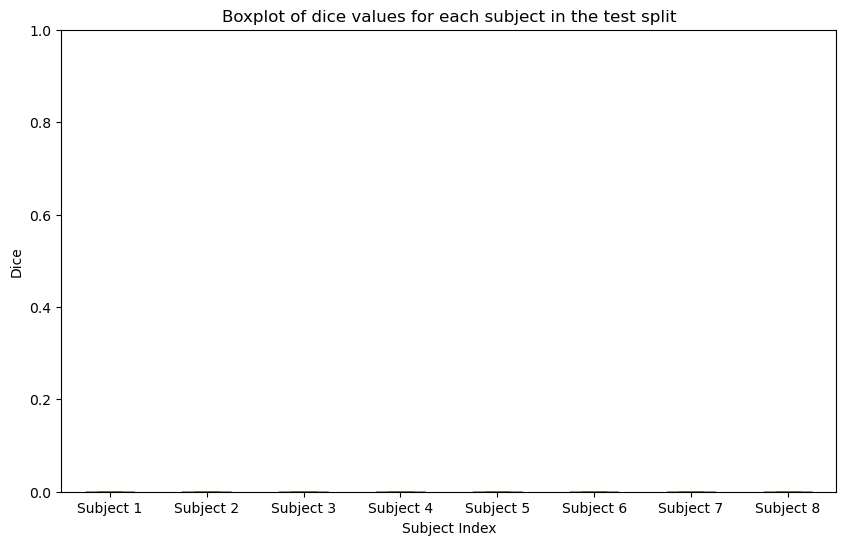

In [ ]:
# Example data: a list of lists
data = Dice_slices_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()